In [1]:
using DataFrames, CSV, GraphPlot, Impute, Plots, Colors, Statistics, Random, Distributions

dir = "../Mariana-Paquete/Mariana-Basefunc/"

include(dir*"funciones_de_red.jl")
include(dir*"objetos.jl")
include(dir*"dinamica_conductores.jl")
include(dir*"animaciones.jl")

plot_digraph (generic function with 1 method)

In [2]:
# Parametros
tamano_red = 10;
doble_sentido = false;
center_h_dist = 0.5;
sd_h_dist = 0;
h_distribution = Normal(center_h_dist, sd_h_dist);
n_cars = 500;
ti = 0.0;
tf = 150;
max_n_dias = 200;
path_csv = "test.csv";

In [3]:
# Generacion de la red
red_cuadrada = create_square_network(tamano_red, both_ways=doble_sentido);
SqNet= red_cuadrada.digraph;
m = nv(SqNet);
posarr = red_cuadrada.position_array;
city_mt = red_cuadrada.city_matrix;

In [4]:
# Generacion de los autos
autos = generate_autos(m,tamano_red,red_cuadrada,n_cars,ti,tf,h_distribution);

In [5]:
# simulacion
day_simulacion = 0;
n_simulacion = 200;

while day_simulacion < 50
    print("día $(day_simulacion) \n")
    times, vels = simulacion!(0., red_cuadrada, autos);
    vels_summ = vels_summary(autos)
    travel_times = times_summary(autos)
    indexes = restart(autos, red_cuadrada)


    df = DataFrame(speeds = [vels_summ],
                times = [travel_times],
                indexes = [indexes]
               )

    CSV.write(path_csv, df, append=true, writeheader = (day_simulacion==0))

    print(minimum(vels_summ)," ", mean(vels_summ),"\n")
    global day_simulacion += 1
end

día 0 
7.995633552163156

 12.788569240376729
día 1 


7.999678761090259 12.793828194554775
día 2 
7.999977874625295

 12.794219997791908
día 3 


7.983516163641585 12.794073232655089
día 4 
7.999990742452448

 12.79409828338912
día 5 


7.999990742452448 12.794117401232697
día 6 
7.999990742452448

 12.7941073574617
día 7 


7.999990742452448 12.794111491185129
día 8 
7.997094900105988

 12.786549366414949
día 9 


7.99967860865141 12.79360409397621
día 10 
7.999977874625295

 12.794202197519105
día 11 


7.998538345689352 12.794021158085629
día 12 
7.983800198804075

 12.794068218474477
día 13 


7.999990742452448 12.794105516223812
día 14 
7.999990742452448

 12.794100435193792
día 15 


7.999990742452448 12.794114120819884
día 16 
7.998390467774317

 12.786455647365006
día 17 


7.99967860865141 12.79363180404341
día 18 
7.999977874625295

 12.794246326395832
día 19 


7.997094900105988 12.794287357104627
día 20 
7.983800198804075

 12.794052238584783
día 21 


7.999990742452448 12.794105093548826
día 22 
7.999990742452448

 12.794094455629375
día 23 


7.999990742452448 12.794113876661156
día 24 
7.9996783037737105

 12.786500597609102
día 25 


7.998234858190346 12.793565945879552
día 26 
7.99983421823538

 12.794032256427133
día 27 


7.999990437574749 12.794265646729981
día 28 
7.983800198804075

 12.794057020837691
día 29 


7.999990742452448 12.794096909850843
día 30 
7.998538345689352

 12.794093109078997
día 31 


7.999990285135898 12.794040884423298
día 32 
7.9996783037737105

 12.786501163263319
día 33 


7.996938528327769 12.793620238849238
día 34 
7.99983421823538

 12.794014195207904
día 35 


7.999990742452448 12.794267003749408
día 36 
7.983800198804075

 12.794056561652376
día 37 


7.999990742452448 12.794089833519847
día 38 
7.997094900105988

 12.794093587977502
día 39 


7.999990742452448 12.79410772549095
día 40 
7.998538345689352

 12.786532625294809
día 41 


7.996938528327769 12.793595577570517
día 42 
7.99983421823538

 12.794038355380776
día 43 


7.999990742452448 12.794274269379557
día 44 
7.983800198804075

 12.794064202290532
día 45 


7.999990742452448 12.794105461738228
día 46 
7.999990285135898

 12.794105663494935
día 47 


7.999990742452448 12.794107233984906
día 48 
7.997094900105988

 12.786341717820152
día 49 


7.996938528327769 12.793626372969308


# Read the file

In [9]:
reads=CSV.read(path_csv,DataFrame);

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/Mariana-Notebooks/vels.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/Mariana-Notebooks/vels.gif")
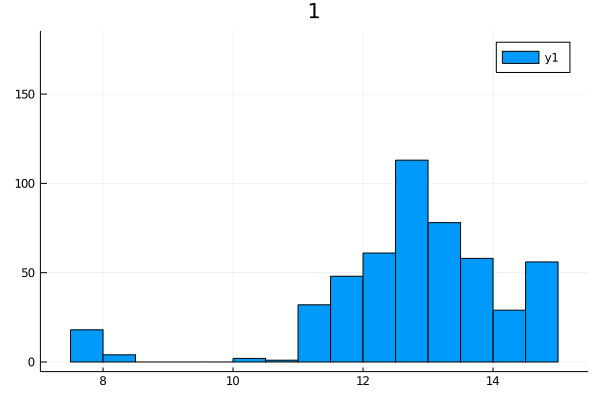

In [10]:
anim = @animate for i in 1:50
    histogram(eval(Meta.parse(reads.speeds[i])),nbins=15,ylim=[0,180],title = string(i))
end

gif(anim, "vels.gif", fps = 2)

┌ Info: Saved animation to 
│   fn = /Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/Mariana-Notebooks/times.gif
└ @ Plots /Users/Mariana/.julia/packages/Plots/XbAWb/src/animation.jl:104


Plots.AnimatedGif("/Users/Mariana/Documents/Code-MarianaTesis/code/julia-code/Mariana-Notebooks/times.gif")
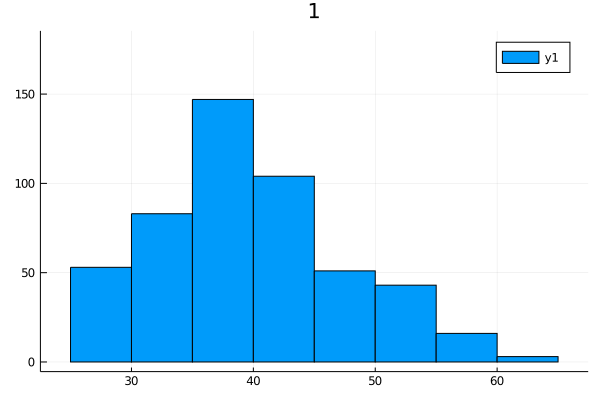

In [11]:
anim = @animate for i in 1:50
    histogram(eval(Meta.parse(reads.times[i])),nbins=15,ylim=[0,180],title = string(i))
end

gif(anim, "times.gif", fps = 2)